Resource : https://ai.google.dev/tutorials/python_quickstart

In [1]:
!pip install -q -U google-generativeai

In [2]:

import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [6]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [7]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


## Generate text from text inputs

In [8]:
model = genai.GenerativeModel('gemini-pro')

In [9]:
%%time
response = model.generate_content("Give me a thought of the day by Abdul Kalam?")
response

CPU times: user 65.6 ms, sys: 8.07 ms, total: 73.7 ms
Wall time: 5.49 s


In [11]:
response.text

"“Failure will never overtake me if my determination to succeed is strong enough.”\n\nAbdul Kalam, former President of India, was renowned for his unwavering optimism and determination. He believed that success could only be achieved through perseverance and resilience. This quote reflects his belief that no matter how challenging the obstacles, one can overcome them if they have the determination to succeed. He emphasized the importance of setting ambitious goals and having the courage to pursue them relentlessly. According to Kalam, failures are inevitable, but they should be seen as opportunities to learn and grow. By staying focused on one's goals and maintaining a strong resolve, one can ultimately achieve success."

In [12]:
response.candidates

[content {
  parts {
    text: "\342\200\234Failure will never overtake me if my determination to succeed is strong enough.\342\200\235\n\nAbdul Kalam, former President of India, was renowned for his unwavering optimism and determination. He believed that success could only be achieved through perseverance and resilience. This quote reflects his belief that no matter how challenging the obstacles, one can overcome them if they have the determination to succeed. He emphasized the importance of setting ambitious goals and having the courage to pursue them relentlessly. According to Kalam, failures are inevitable, but they should be seen as opportunities to learn and grow. By staying focused on one\'s goals and maintaining a strong resolve, one can ultimately achieve success."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLI

In [14]:
%%time
response = model.generate_content("Give me a thought of the day by Abdul Kalam?", stream=True)

CPU times: user 54.6 ms, sys: 9.6 ms, total: 64.2 ms
Wall time: 5.8 s


In [17]:
from pprint import pprint
for chunk in response:
  pprint(chunk.text)
  print("_"*80)

('"Failure will never overtake me if my determination to succeed is strong '
 'enough." -')
________________________________________________________________________________
(' Dr. A.P.J. Abdul Kalam\n'
 '\n'
 'This quote by Dr. Abdul Kalam, the former President of India and a renowned '
 'scientist, serves as a')
________________________________________________________________________________
(' powerful reminder of the importance of perseverance and determination in '
 'achieving success. It emphasizes that no matter the obstacles or setbacks '
 "one may face, success can be achieved if one's determination to succeed is "
 'unwavering.\n'
 '\n'
 'The quote encourages us to embrace a mindset of resilience and '
 'determination, to never give up on our dreams and aspirations,')
________________________________________________________________________________
(' and to keep moving forward despite any challenges or failures we may '
 'encounter along the way. It reminds us that success is 

In [18]:
response.resolve()

## Generate text from image and text inputs

In [19]:
img_pth = "/content/drive/MyDrive/NLP/img2text/desperate.jpg"

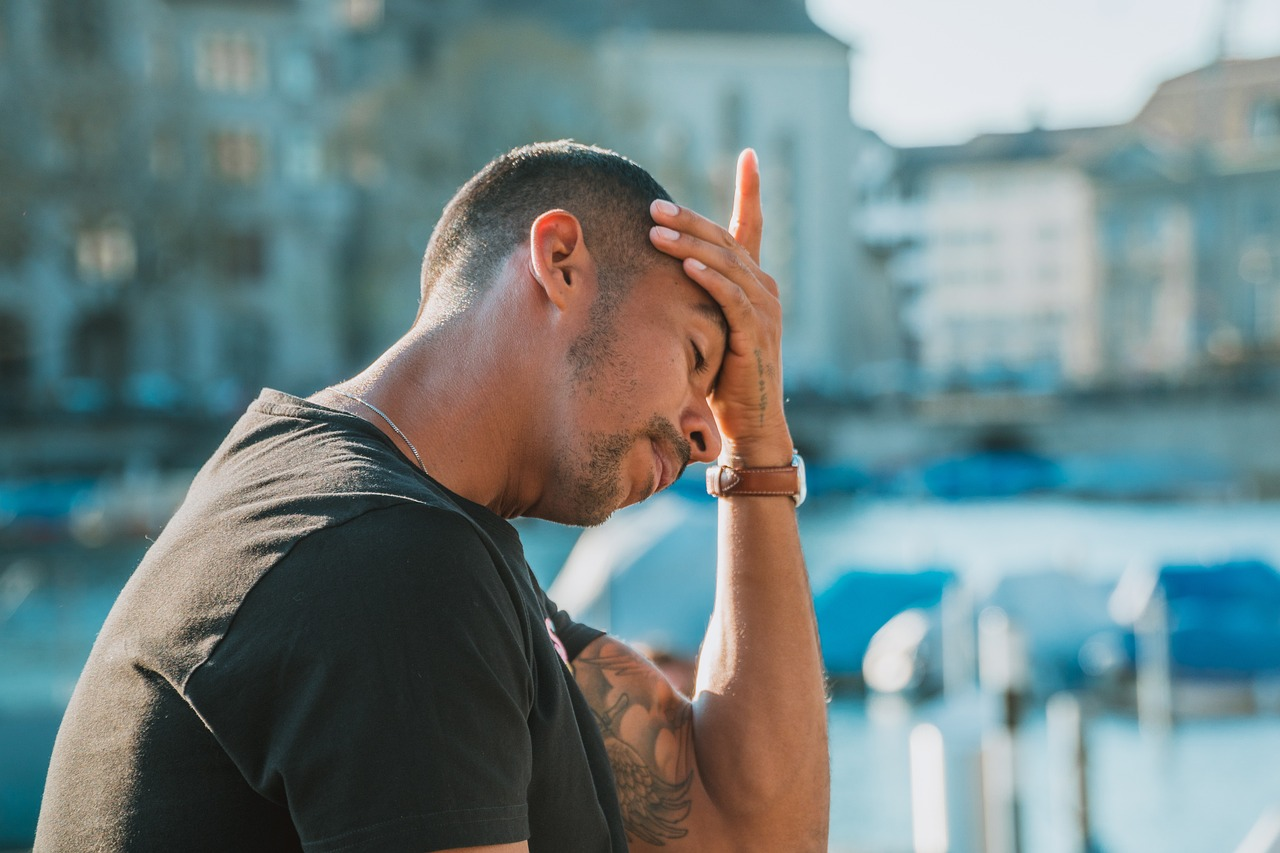

In [21]:
import PIL.Image

img = PIL.Image.open(img_pth)
img

In [22]:
model = genai.GenerativeModel('gemini-pro-vision')

In [23]:
response = model.generate_content(img)

to_markdown(response.text)

>  There are many things that can cause a person to feel stressed. Some common causes include work, school, family, relationships, and money. Stress can also be caused by major life events, such as a death in the family or a natural disaster.
> 
> There are many different ways to cope with stress. Some people find that exercise helps them to relieve stress, while others find that talking to a friend or family member helps. Some people also find that meditation or yoga helps them to relax and de-stress.
> 
> It is important to find healthy ways to cope with stress, as it can have a negative impact on your physical and mental health. If you are feeling overwhelmed by stress, it is important to seek professional help.

In [24]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the every object in the image", img], stream=True)
response.resolve()

In [25]:
to_markdown(response.text)

>  There is a man in the picture. His eyes are closed, and his hand is on his head. He is wearing a black t-shirt and a brown watch. He has a tattoo on his left arm. There are buildings and boats in the background. The picture is taken from a side angle.

## Chat conversations

In [26]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [27]:
prompt= """ As you are a good master chef, explain the process of any given dish sept-by-step. The given dish is...\nHelp me to prepare Maggi dish. """
response = chat.send_message(prompt)
to_markdown(response.text)

> 1. **Gather Ingredients:**
> 
>    - 1 packet Maggi noodles
>    - 1 packet Maggi tastemaker
>    - 1 tablespoon oil
>    - 1 cup water
>    - 1/2 teaspoon red chili powder (optional)
>    - 1/4 teaspoon garam masala (optional)
>    - 1/4 cup chopped vegetables (optional, such as carrots, onions, peas)
> 
> 
> 2. **Prepare Vegetables (if using):**
> 
>    - If you are using vegetables, wash and chop them into small pieces.
> 
> 
> 3. **Heat Oil:**
> 
>    - In a saucepan or wok, heat the oil over medium heat.
> 
> 
> 4. **Add Vegetables (if using):**
> 
>    - If you are using vegetables, add them to the hot oil and sauté for a few minutes until tender.
> 
> 
> 5. **Add Maggi Noodles:**
> 
>    - Add the Maggi noodles to the saucepan or wok.
> 
> 
> 6. **Add Water and Tastemaker:**
> 
>    - Add the water and Maggi tastemaker to the saucepan or wok.
> 
> 
> 7. **Bring to a Boil:**
> 
>    - Bring the mixture to a boil.
> 
> 
> 8. **Reduce Heat and Simmer:**
> 
>    - Reduce the heat to low and simmer for 2-3 minutes, or until the noodles are tender.
> 
> 
> 9. **Add Spices (optional):**
> 
>    - If you like, add the red chili powder and garam masala.
> 
> 
> 10. **Stir and Serve:**
> 
>    - Stir well and serve hot.

In [28]:
chat.history

[parts {
   text: " As you are a good master chef, explain the process of any given dish sept-by-step. The given dish is...\nHelp me to prepare Maggi dish. "
 }
 role: "user",
 parts {
   text: "1. **Gather Ingredients:**\n\n   - 1 packet Maggi noodles\n   - 1 packet Maggi tastemaker\n   - 1 tablespoon oil\n   - 1 cup water\n   - 1/2 teaspoon red chili powder (optional)\n   - 1/4 teaspoon garam masala (optional)\n   - 1/4 cup chopped vegetables (optional, such as carrots, onions, peas)\n\n\n2. **Prepare Vegetables (if using):**\n\n   - If you are using vegetables, wash and chop them into small pieces.\n\n\n3. **Heat Oil:**\n\n   - In a saucepan or wok, heat the oil over medium heat.\n\n\n4. **Add Vegetables (if using):**\n\n   - If you are using vegetables, add them to the hot oil and saut\303\251 for a few minutes until tender.\n\n\n5. **Add Maggi Noodles:**\n\n   - Add the Maggi noodles to the saucepan or wok.\n\n\n6. **Add Water and Tastemaker:**\n\n   - Add the water and Maggi tast

In [29]:
## IF YOU WANT TO CONTINUE THE CHAT, WE CAN START THE CONVERSATION BY PASSING "stream= True"
response = chat.send_message("Ok, Tell me more, how does the magic tastemaker is healthy for human life.", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

The Maggi tastemaker is not particularly healthy for human life. It is high
________________________________________________________________________________
 in sodium and contains monosodium glutamate (MSG), which can be harmful to some people. Additionally, it contains artificial colors and flavors, which are not considered
________________________________________________________________________________
 to be healthy.

However, Maggi does offer a healthier alternative called Maggi Masala-ae-Magic. This tastemaker contains natural spices and herbs, and is lower in sodium than the original Maggi tastemaker. It is also free from MSG and artificial colors and flavors.

Here is a comparison of the
________________________________________________________________________________
 nutritional information for the two Maggi tastemakers:

| Nutrient | Maggi Tastemaker | Maggi Masala-ae-Magic |
|---|---|---|
| Sodium | 1100 mg | 800 mg |
| MSG | Contains MSG | MSG-free |
| Artificial colors | C

In [31]:
pprint(response.text)

('The Maggi tastemaker is not particularly healthy for human life. It is high '
 'in sodium and contains monosodium glutamate (MSG), which can be harmful to '
 'some people. Additionally, it contains artificial colors and flavors, which '
 'are not considered to be healthy.\n'
 '\n'
 'However, Maggi does offer a healthier alternative called Maggi '
 'Masala-ae-Magic. This tastemaker contains natural spices and herbs, and is '
 'lower in sodium than the original Maggi tastemaker. It is also free from MSG '
 'and artificial colors and flavors.\n'
 '\n'
 'Here is a comparison of the nutritional information for the two Maggi '
 'tastemakers:\n'
 '\n'
 '| Nutrient | Maggi Tastemaker | Maggi Masala-ae-Magic |\n'
 '|---|---|---|\n'
 '| Sodium | 1100 mg | 800 mg |\n'
 '| MSG | Contains MSG | MSG-free |\n'
 '| Artificial colors | Contains artificial colors | Free from artificial '
 'colors |\n'
 '| Artificial flavors | Contains artificial flavors | Free from artificial '
 'flavors |\n'
 '\n'
 '

In [39]:
response.resolve()

None


In [40]:
# response = chat.send_message("who is the current CEO of Maggi and in which countries, the maggi is available.", stream=True)
pprint(response.text)

('The current CEO of Maggi is **Stefan De Loecker**. He has been in this '
 'position since January 2023.\n'
 '\n'
 'Maggi products are available in many countries around the world, including:\n'
 '\n'
 '* **Asia:** India, Pakistan, Bangladesh, Nepal, Sri Lanka, Myanmar, '
 'Thailand, Malaysia, Singapore, Indonesia, Philippines, Vietnam, China, '
 'Japan, South Korea\n'
 '* **Africa:** South Africa, Kenya, Nigeria, Ghana, Ivory Coast, Senegal, '
 'Cameroon, Gabon, Congo, Angola, Zambia, Zimbabwe, Mozambique, Tanzania, '
 'Uganda, Rwanda, Burundi, Malawi\n'
 '* **Europe:** Germany, Switzerland, Austria, France, Italy, Spain, Portugal, '
 'Belgium, Netherlands, Luxembourg, Denmark, Sweden, Norway, Finland, Iceland\n'
 '* **Americas:** United States, Canada, Mexico, Brazil, Argentina, Chile, '
 'Peru, Colombia, Venezuela, Ecuador, Bolivia, Paraguay, Uruguay\n'
 '\n'
 'Maggi is also available in many other countries around the world, but these '
 'are some of the main markets.\n'
 '\n'
 'M

In [41]:
## IF YOU WANT TO CONTINUE THE CHAT, WE CAN START THE CONVERSATION BY PASSING "stream= True"



response = chat.send_message("who is the current president of India, US, Pakistan, China, Russisa. Show the output in .json format with the key : 'Leaders'", stream=True)
# response.resolve()
# response.text

In [43]:
response.resolve()
pprint(response.text)

('```json\n'
 '{\n'
 '  "Leaders": {\n'
 '    "India": "Droupadi Murmu",\n'
 '    "US": "Joe Biden",\n'
 '    "Pakistan": "Arif Alvi",\n'
 '    "China": "Xi Jinping",\n'
 '    "Russia": "Vladimir Putin"\n'
 '  }\n'
 '}\n'
 '```')


In [45]:
print(response.text)

```json
{
  "Leaders": {
    "India": "Droupadi Murmu",
    "US": "Joe Biden",
    "Pakistan": "Arif Alvi",
    "China": "Xi Jinping",
    "Russia": "Vladimir Putin"
  }
}
```


In [46]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**:  As you are a good master chef, explain the process of any given dish sept-by-step. The given dish is...
> Help me to prepare Maggi dish. 

> **model**: 1. **Gather Ingredients:**
> 
>    - 1 packet Maggi noodles
>    - 1 packet Maggi tastemaker
>    - 1 tablespoon oil
>    - 1 cup water
>    - 1/2 teaspoon red chili powder (optional)
>    - 1/4 teaspoon garam masala (optional)
>    - 1/4 cup chopped vegetables (optional, such as carrots, onions, peas)
> 
> 
> 2. **Prepare Vegetables (if using):**
> 
>    - If you are using vegetables, wash and chop them into small pieces.
> 
> 
> 3. **Heat Oil:**
> 
>    - In a saucepan or wok, heat the oil over medium heat.
> 
> 
> 4. **Add Vegetables (if using):**
> 
>    - If you are using vegetables, add them to the hot oil and sauté for a few minutes until tender.
> 
> 
> 5. **Add Maggi Noodles:**
> 
>    - Add the Maggi noodles to the saucepan or wok.
> 
> 
> 6. **Add Water and Tastemaker:**
> 
>    - Add the water and Maggi tastemaker to the saucepan or wok.
> 
> 
> 7. **Bring to a Boil:**
> 
>    - Bring the mixture to a boil.
> 
> 
> 8. **Reduce Heat and Simmer:**
> 
>    - Reduce the heat to low and simmer for 2-3 minutes, or until the noodles are tender.
> 
> 
> 9. **Add Spices (optional):**
> 
>    - If you like, add the red chili powder and garam masala.
> 
> 
> 10. **Stir and Serve:**
> 
>    - Stir well and serve hot.

> **user**: Ok, Tell me more, how does the magic tastemaker is healthy for human life.

> **model**: The Maggi tastemaker is not particularly healthy for human life. It is high in sodium and contains monosodium glutamate (MSG), which can be harmful to some people. Additionally, it contains artificial colors and flavors, which are not considered to be healthy.
> 
> However, Maggi does offer a healthier alternative called Maggi Masala-ae-Magic. This tastemaker contains natural spices and herbs, and is lower in sodium than the original Maggi tastemaker. It is also free from MSG and artificial colors and flavors.
> 
> Here is a comparison of the nutritional information for the two Maggi tastemakers:
> 
> | Nutrient | Maggi Tastemaker | Maggi Masala-ae-Magic |
> |---|---|---|
> | Sodium | 1100 mg | 800 mg |
> | MSG | Contains MSG | MSG-free |
> | Artificial colors | Contains artificial colors | Free from artificial colors |
> | Artificial flavors | Contains artificial flavors | Free from artificial flavors |
> 
> Overall, Maggi Masala-ae-Magic is a healthier option than the original Maggi tastemaker. It is lower in sodium, free from MSG and artificial colors and flavors, and contains natural spices and herbs.
> 
> It is important to note that even Maggi Masala-ae-Magic should be consumed in moderation, as it is still a processed food. A healthy diet should be based on whole, unprocessed foods, such as fruits, vegetables, and whole grains.

> **user**: who is the current CEO of Maggi and in which countries, the maggi is available.

> **model**: The current CEO of Maggi is **Stefan De Loecker**. He has been in this position since January 2023.
> 
> Maggi products are available in many countries around the world, including:
> 
> * **Asia:** India, Pakistan, Bangladesh, Nepal, Sri Lanka, Myanmar, Thailand, Malaysia, Singapore, Indonesia, Philippines, Vietnam, China, Japan, South Korea
> * **Africa:** South Africa, Kenya, Nigeria, Ghana, Ivory Coast, Senegal, Cameroon, Gabon, Congo, Angola, Zambia, Zimbabwe, Mozambique, Tanzania, Uganda, Rwanda, Burundi, Malawi
> * **Europe:** Germany, Switzerland, Austria, France, Italy, Spain, Portugal, Belgium, Netherlands, Luxembourg, Denmark, Sweden, Norway, Finland, Iceland
> * **Americas:** United States, Canada, Mexico, Brazil, Argentina, Chile, Peru, Colombia, Venezuela, Ecuador, Bolivia, Paraguay, Uruguay
> 
> Maggi is also available in many other countries around the world, but these are some of the main markets.
> 
> Maggi products are not available in some countries due to religious or cultural reasons. For example, Maggi products are not available in Saudi Arabia because they contain pork fat.

> **user**: who is the current CEO of Maggi and in which countries, the maggi is available.

> **model**: The current CEO of Maggi is **Stefan De Loecker**. He has been in this position since January 2023.
> 
> Maggi products are available in many countries around the world, including:
> 
> * **Asia:** India, Pakistan, Bangladesh, Nepal, Sri Lanka, Myanmar, Thailand, Malaysia, Singapore, Indonesia, Philippines, Vietnam, China, Japan, South Korea
> * **Africa:** South Africa, Kenya, Nigeria, Ghana, Ivory Coast, Senegal, Cameroon, Gabon, Congo, Angola, Zambia, Zimbabwe, Mozambique, Tanzania, Uganda, Rwanda, Burundi, Malawi
> * **Europe:** Germany, Switzerland, Austria, France, Italy, Spain, Portugal, Belgium, Netherlands, Luxembourg, Denmark, Sweden, Norway, Finland, Iceland
> * **Americas:** United States, Canada, Mexico, Brazil, Argentina, Chile, Peru, Colombia, Venezuela, Ecuador, Bolivia, Paraguay, Uruguay
> 
> Maggi is also available in many other countries around the world, but these are some of the main markets.
> 
> Maggi products are not available in some countries due to religious or cultural reasons. For example, Maggi products are not available in Saudi Arabia because they contain pork fat.

> **user**: who is the current president of India, US, Pakistan, China, Russisa. Show the output in .json format with the key : 'Leaders'

> **model**: ```json
> {
>   "Leaders": {
>     "India": "Droupadi Murmu",
>     "US": "Joe Biden",
>     "Pakistan": "Arif Alvi",
>     "China": "Xi Jinping",
>     "Russia": "Vladimir Putin"
>   }
> }
> ```

## The End

# Happy Learning !!